In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.style.use(plt.style.available[24])

C:\Users\ronak\AppData\Local\Temp\ipykernel_6884\2109068374.py:22: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax[1].annotate('', xy=(0, 1), xytext=(0, 0), arrowprops=dict(shrink=.01, width=0.5, headwidth=5, headlength=3, color='white', facecolor='white'))


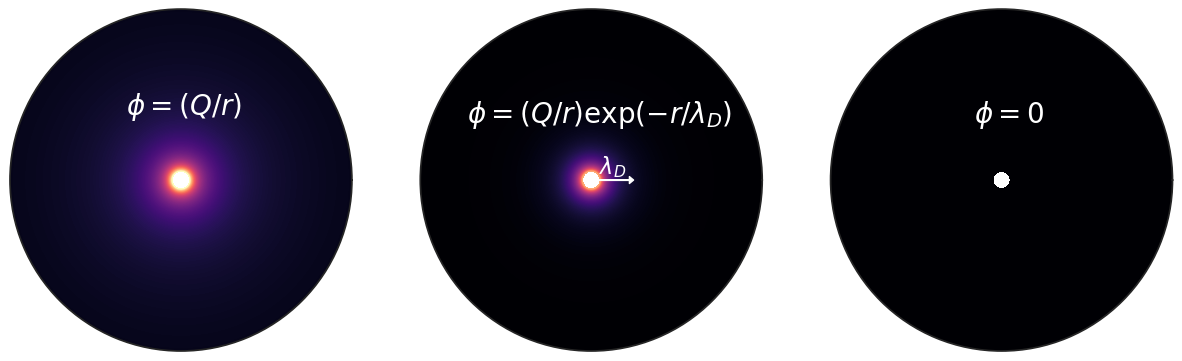

In [94]:
cmap='magma'
def e(r):
    return 1 / r

def eD(r):
    return 1 / r * np.exp(-r)

r = np.linspace(0.2, 4, 100)
theta = np.linspace(0, 2*np.pi, 100)
R, Theta = np.meshgrid(r, theta)
levels = np.linspace(0, 5, 1000)
Z1 = e(R)
Z2 = eD(R)
Z3 = R*0
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, ncols=3, figsize=(15, 5))
c = ax[0].contourf(Theta, R, Z1, levels=levels, cmap=cmap)
c = ax[1].contourf(Theta, R, Z2, levels=levels, cmap=cmap)
c = ax[2].contourf(Theta, R, Z3, levels=levels, cmap=cmap)
ax[0].text(130*np.pi/180, 2, '$\phi = (Q/r)$', fontsize=20, color='white')
ax[1].text(155*np.pi/180, 3.2, '$\phi = (Q/r) \exp(-r/\lambda_D)$', fontsize=20, color='white')
ax[2].text(115*np.pi/180, 1.5, '$\phi = 0$', fontsize=20, color='white')
ax[1].annotate('', xy=(0, 1), xytext=(0, 0), arrowprops=dict(shrink=.01, width=0.5, headwidth=5, headlength=3, color='white', facecolor='white'))
ax[1].text(0.75, 0.25, '$\lambda_D$', fontsize=16, color='white')
for i in range(3):
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].grid(False)
    ax[i].set_ylim(0, 4)
fig.frameon = False
fig.savefig('images/debye_length.png', dpi=300)


## Resonance and Brunel Absorption

C:\Users\ronak\AppData\Local\Temp\ipykernel_6884\3527450672.py:17: RuntimeWarning: invalid value encountered in divide
  f = (np.sqrt(1 + 8*beta) - 1) / (2 * beta)


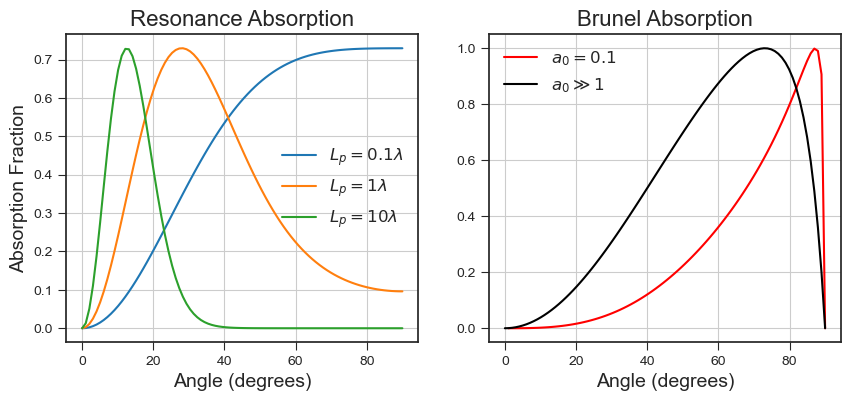

In [108]:
def phi(k, theta, l):
    tau = (k * l)**(1/3) * np.sin(theta)
    return 2.3 * tau * np.exp(-2*tau**2 / 3)

def fa(k, theta, l):
    phi0 = phi(k, theta, l)
    return phi0**2/2

def eta2(theta):
    alpha = np.sin(theta)**2 / np.cos(theta)
    return 4 * np.pi * alpha / (np.pi + alpha)**2

def eta1(theta):
    a0 = .3
    alpha = np.sin(theta)**3 / np.cos(theta)
    beta = a0 * alpha / (2 * np.pi)
    f = (np.sqrt(1 + 8*beta) - 1) / (2 * beta)
    return a0 / (2 * np.pi) * f**3 * alpha

λ = 0.8
k = 2 * np.pi / λ
theta = np.linspace(0, np.pi/2, 90)
l = np.linspace(0, 2*λ, 1000)

fig, ax = plt.subplots(figsize=(10, 4), ncols=2)
ax[0].grid(True)
ax[0].plot(theta*180/np.pi, fa(k, theta, 0.1*λ), label='$L_p = 0.1 \lambda$')
ax[0].plot(theta*180/np.pi, fa(k, theta, 1*λ), label='$L_p = 1 \lambda$')
ax[0].plot(theta*180/np.pi, fa(k, theta, 10*λ), label='$L_p = 10 \lambda$')
ax[0].set_xlabel('Angle (degrees)', fontsize=14)
ax[0].set_ylabel('Absorption Fraction', fontsize=14)
ax[0].set_title('Resonance Absorption', fontsize=16)
ax[0].legend(fontsize=12)
ax[1].grid(True)
ax[1].plot(theta*180/np.pi, eta1(theta), label='$a_0 = 0.1$', color='red')
ax[1].plot(theta*180/np.pi, eta2(theta), label='$a_0 \gg 1$', color='k')
ax[1].legend(fontsize=12)
ax[1].set_title('Brunel Absorption', fontsize=16)
ax[1].set_xlabel('Angle (degrees)', fontsize=14)
#ax[1].set_ylabel('Absorption Fraction', fontsize=14)
ax[1].legend(fontsize=12)
fig.savefig('images/absorption.png', dpi=300)

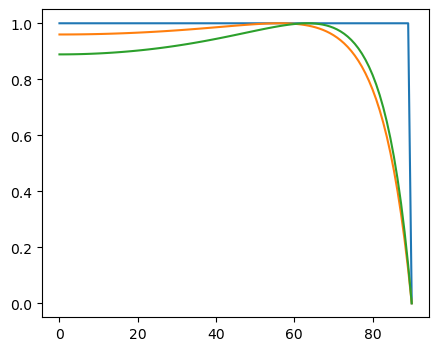

In [86]:
def trans(theta, n):
    alpha = np.sqrt(1 - np.sin(theta)**2 / n**2) / np.cos(theta) 
    beta = n 
    return alpha * beta * (2 / (alpha + beta))**2

theta = np.linspace(0, np.pi/2, 100)
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(theta*180/np.pi, trans(theta, 1))
ax.plot(theta*180/np.pi, trans(theta, 1.5))
ax.plot(theta*180/np.pi, trans(theta, 2))

## Shape Functions

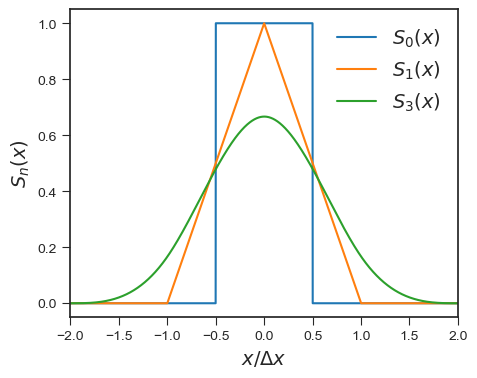

In [12]:
xs = np.arange(-5, 5, 0.001)
dx = xs[1]-xs[0]
tophat = lambda x: 1 if abs(x) <= 0.5 else 0
y_tophat = np.piecewise(xs, [abs(xs) <= 0.5, abs(xs) > 0.5], [1, 0])
y_triangle = np.convolve(y_tophat, y_tophat, 'same') * dx
y_spline = np.convolve(y_triangle, y_triangle, 'same') * dx
fig, ax = plt.subplots(figsize=(5, 4))
ax.set_xlim([-2 , 2])
ax.plot(xs, y_tophat, label='$S_0(x)$')
ax.plot(xs, y_triangle, label='$S_1(x)$')
ax.plot(xs, y_spline, label='$S_3(x)$')
ax.set_xlabel('$x/\Delta x$', fontsize=14)
ax.set_ylabel('$S_n(x)$', fontsize=14)
ax.legend(fontsize=14)
plt.savefig('images/shape_functions.png', dpi=300)